In [6]:
import yaml
import sys
import os
import numpy as np
import torch 
print('START')
os.chdir('/home/jonfrey/PLR3')
sys.path.insert(0, os.getcwd())
sys.path.append(os.path.join(os.getcwd() + '/src'))
sys.path.append(os.path.join(os.getcwd() + '/lib'))

import loaders_v2
from loaders_v2 import GenericDataset
from rotations import * 

exp_cfg_path = '/home/jonfrey/PLR3/yaml/exp/exp_ws_deepim_debug_natrix.yml'
env_cfg_path = '/home/jonfrey/PLR3/yaml/env/env_natrix_jonas.yml'

def load_from_file(p):
    if os.path.isfile(p):
        with open(p, 'r') as f:
            data = yaml.safe_load(f)
    else:
        raise ValueError
    return data

exp = load_from_file(exp_cfg_path)
env = load_from_file(env_cfg_path)

dataset_train = GenericDataset(
    cfg_d=exp['d_train'],
    cfg_env=env)

START
Finished loading meshes 0.04399824142456055


In [7]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import copy
import k3d

class Drawer():
    def __init__(self):
        self.im_in_plot = 0
        self.data = []
    def disp_img_1d(self,img,hold=False):
        self.data.append(img)
        
        if not hold:
            fig = plt.figure(figsize=(6*2*len(self.data),7))
            ax = []
            for j,a in enumerate(self.data):
                ax.append( fig.add_subplot(1,len(self.data), j+1)  )
                
                ax[-1].get_xaxis().set_visible(False)
                ax[-1].get_yaxis().set_visible(False)
                pos = ax[-1].imshow( a, cmap='Blues' )
                fig.colorbar(pos, ax=ax[-1])
            plt.show()
            self.data = []
            self.ax = []
            print('SHOW')
            
def plot_two_pcd_line(x, y, point_size=0.005, c1='g', c2='r'):
    if c1 == 'b':
        k = 245
    elif c1 == 'g':
        k = 25811000
    elif c1 == 'r':
        k = 11801000
    elif c1 == 'black':
        k = 2580
    else:
        k = 2580

    if c2 == 'b':
        k2 = 245
    elif c2 == 'g':
        k2 = 25811000
    elif c2 == 'r':
        k2 = 11801000
    elif c2 == 'black':
        k2 = 2580
    else:
        k2 = 2580

    col1 = np.ones(x.shape[0]) * k
    col2 = np.ones(y.shape[0]) * k2
    plot = k3d.plot(name='points')
    plt_points = k3d.points(x, col1.astype(np.uint32), point_size=point_size)
    plot += plt_points
    plt_points = k3d.points(y, col2.astype(np.uint32), point_size=point_size)
    plot += plt_points
    for i in range(min(100,x.shape[0]) ):
        plot += k3d.line([x[i],y[i]],shader='mesh', width=0.0005, color=0xff0000)
    
    plt_points.shader = '3d'
    plot.display()
    
draw = Drawer()

In [8]:
from scipy.spatial.transform import Rotation as R
nr = 5
degree =  np.random.normal(
                0, nr, (1, 3))
print(degree)
r2 = R.from_euler('zyx', degree, degrees=True) .as_matrix()
print(r2)

[[-0.60349849 -2.3812002  -6.89620731]]
[[[ 0.99908109  0.01052375 -0.04154782]
  [-0.00546822  0.99276277  0.11996744]
  [ 0.04250964 -0.11963001  0.99190806]]]


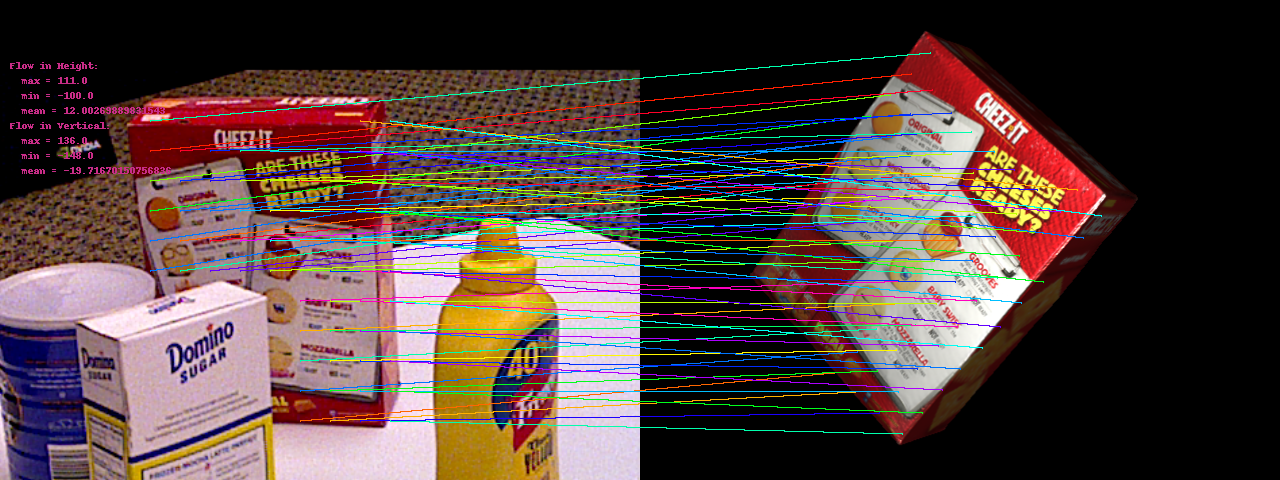

/home/jonfrey/miniconda3/envs/track_latest/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


2 tensor([[ 0.2587, -0.9653, -0.0360,  0.0085],
        [-0.3792, -0.0672, -0.9229, -0.1037],
        [ 0.8884,  0.2524, -0.3834,  0.9668],
        [ 0.0000,  0.0000,  0.0000,  1.0000]])
Fin tensor([[ 0.2783, -0.9580, -0.0685, -0.0065],
        [-0.4130, -0.0549, -0.9091, -0.0933],
        [ 0.8672,  0.2813, -0.4110,  0.9701],
        [ 0.0000,  0.0000,  0.0000,  1.0000]])
Relative angle: tensor([0.0501]), Distance: 0.018491534516215324
How good does the rendered look


Output()

How good does the real look


Output()

Input Error


Output()

Output Error


Output()

In [15]:
import time
st = time.time()
for j in range(0,1):
    i = np.random.randint(0,10000)
    batch = dataset_train[i][0] #bann 10450
    points, choose, img, target, model_points, idx = batch[0:6]
    depth_img, label_img, img_orig, cam = batch[6:10]
    gt_rot_wxyz, gt_trans, unique_desig = batch[10:13]

    real_img, render_img, real_d, render_d, gt_label_cropped = batch[13:18]
    pred_rot_wxyz, pred_trans, pred_points, h_render,h_real, render_img_original = batch[18:24]
    u_map, v_map, flow_mask, bb = batch[24:]
    real_tl, real_br, ren_tl, ren_br = bb
    from visu import Visualizer
    visualizer = Visualizer('/home/jonfrey/Debug')
    visualizer.plot_corrospondence('tag', 2, u_map, v_map, flow_mask, real_img, render_img, store=False, jupyter=True, coloful = True)

#     draw = Drawer()
#     draw.disp_img_1d( u_map, True)
#     draw.disp_img_1d( v_map, True)
#     draw.disp_img_1d( flow_mask )
#     # draw.disp_img_1d( gt_label_cropped )

# #     c1[ int(b_real.tl[0]):int(b_real.br[0]), int(b_real.tl[1]):int(b_real.tl[1]+5) ] = 100000
# #     c1[ int(b_real.tl[0]):int(b_real.br[0]), int(b_real.br[1]):int(b_real.br[1]+5) ] = 100000
#     img_orig [ int(b_real.tl[0]):int(b_real.br[0]), int(b_real.tl[1]):int(b_real.tl[1]+5),:] = torch.tensor( [0,255,0] )
#     img_orig [ int(b_real.tl[0]):int(b_real.br[0]), int(b_real.br[1]):int(b_real.br[1]+5),:] = torch.tensor( [0,255,0] )
#     print(b_ren.br, b_ren.tl)
    
#     render_img_original [ int(b_ren.tl[0]):int(b_ren.br[0]), int(b_ren.tl[1]):int(b_ren.tl[1]+5),:] = torch.tensor( [0,255,0] )
#     render_img_original [ int(b_ren.tl[0]):int(b_ren.br[0]), int(b_ren.br[1]):int(b_ren.br[1]+5),:] = torch.tensor( [0,255,0] )

#     display( Image.fromarray(np.uint8(img_orig.numpy())) )
#     display( Image.fromarray(np.uint8(render_img_original.numpy())) )


import rotations
from deep_im import flow_to_trafo

#K_ren = torch.from_numpy( dataset_train._backend.get_camera('data/0069/000000', K=True) )

K_ren = torch.from_numpy( dataset_train._backend.get_camera('data_syn/0019', K=True) )

K_real =  torch.from_numpy(dataset_train._backend.get_camera(unique_desig[0], K=True) )
o = quat_to_rot(pred_rot_wxyz[None,:], conv='wxyz')
h_real_est = torch.eye(4)
h_real_est[:3,:3] = o
h_real_est[:3,3] = torch.tensor( pred_trans )



P_real, P_ren, P_real_trafo, T_res = flow_to_trafo(
                            real_br, real_tl,ren_br, ren_tl, 
                            flow_mask, 
                            u_map, v_map, 
                            K_real, K_ren, 
                            real_d[0], render_d[0], 
                            h_real_est, h_render)

sam1 = max(1,int(P_real.shape[0]/200))

# plot_two_pcd_line(P_real.numpy()[::sam1,:], P_ren.numpy()[::sam1,:])
# plot_two_pcd_line(P_real_trafo.numpy()[::sam1,:], P_ren.numpy()[::sam1,:])




P_hr = torch.ones( (P_real.shape[0],4 ) , device=u_map.device)
P_hr[:,:3] = P_real


print( '2', T_res @ h_render )
print( 'Fin', h_real )

def info_H (h1,h2):
    from pytorch3d.transforms import so3_relative_angle
    rel = so3_relative_angle(h1[:3,:3][None], h2[:3,:3][None])
    print(f'Relative angle: {rel}, Distance: {torch.norm( h1[:3,3] - h2[:3,3] )}')

info_H(T_res @ h_render, h_real)

h_old = h_real_est
h_new = T_res @ h_render
h_gt = h_real

def get_trafo(points, H):
    p = points.shape[0]
    return copy.deepcopy(points) @ H[:3,:3].T + H[:3,3][None,:].repeat(p,1)
    
mp_old = get_trafo(model_points, h_old)
mp_new = get_trafo(model_points, h_new)
mp_gt = get_trafo(model_points, h_gt)

mp_render = get_trafo(model_points, h_render)
sam = max(1,int(mp_render.shape[0]/100))

print('How good does the rendered look')
plot_two_pcd_line(mp_render.numpy()[::sam,:],  P_ren.numpy()[::sam1,:]) 


print('How good does the real look')
plot_two_pcd_line(mp_gt.numpy()[::sam,:],  P_real.numpy()[::sam1,:]) 


print('Input Error')
plot_two_pcd_line(mp_gt.numpy()[::sam,:], mp_old.numpy()[::sam,:])

print('Output Error')
plot_two_pcd_line(mp_gt.numpy()[::sam,:], mp_new.numpy()[::sam,:]) 


#compare ointcloud with real position: 


In [5]:
import rotations

K_ren = torch.from_numpy( dataset_train._backend.get_camera('data_syn/000001', K=True) )
K_real =  torch.from_numpy(dataset_train._backend.get_camera('data_syn/000001', K=True) )

# print(pred_rot_wxyz[None,:], type(pred_rot_wxyz))
# h_real is nothing else then the gt estimate. Instead use 
o = quat_to_rot(pred_rot_wxyz[None,:], conv='wxyz')
h_real_est = torch.eye(4)
h_real_est[:3,:3] = o
h_real_est[:3,3] = torch.tensor( pred_trans )

# print(h_real_est- h_real)
    
    
P_real, P_ren, P_real_trafo, T_res = flow_to_trafo_jup(
                            real_br, real_tl,ren_br, ren_tl, 
                            flow_mask, 
                            u_map, v_map, 
                            K_real, K_ren, 
                            real_d[0], render_d[0], 
                            h_real_est, h_render)
print(f"Init : \n {h_real_est}")

print(f"GT : \n {h_real}")

print(f"Out : \n {T_res}")

print(f"Out inverse: \n {torch.inverse( T_res) }")
# print(pred_trans)

#print(f"Do they match {(T_res)[:3,3]} {torch.tensor( gt_trans )- pred_trans} ???")

#print(( h_real_est @ torch.inverse(T_res) ) [:3,3])
#print(( torch.inverse(T_res) @ h_real_est ) [:3,3])
#print(( h_real_est @ T_res ) [:3,3])
#print(( T_res @ h_real_est ) [:3,3])
#print(( h_real) [:3,3])

#print(T_res)


#print(f"GT Cam to Obj Center: \n{h_real}")
#print( h_real_est @ T_res )
#h_real_est_new = torch.eye(4)
#h_real_est_new[:3,:3] = h_real_est[:3,:3] @ T_res[:3,:3].T
#h_real_est_new[:3,3] = h_real_est[:3,3] + T_res[:3,3]             

# print(f"Obj Center Estimate to Render: \n{T_res}")
#print(h_real_est_new)
#h_real_est_new[:3,:3] = h_real_est[:3,:3].T @ T_res[:3,:3]
#print(h_real_est_new)

#h_real_est_new[:3,:3] = T_res[:3,:3] @ h_real_est[:3,:3]

#th =  T_res @ h_real_est
#th[:3,3] = h_real_est[:3,3] + T_res[:3,3]  
#print(f"Theorie: \n{th}")

#print(h_real_est_new)
#h_real_est_new[:3,:3] = T_res[:3,:3].T @ h_real_est[:3,:3]
#print(h_real_est_new)

sam = max(1,int(P_real.shape[0]/100))
plot_two_pcd_line(P_real.numpy()[::sam,:], P_ren.numpy()[::sam,:])
plot_two_pcd_line(P_real_trafo.numpy()[::sam,:], P_ren.numpy()[::sam,:])


#mp = torch.ones( (model_points.shape[0],4))
#mp[:,:3] = model_points

#mp1 = (copy.deepcopy(mp) @ th.T )[:,:3]
#mp2 = (copy.deepcopy(mp) @ h_real.T )[:,:3]
#print(mp1)
#sam = max(1,int(mp1.shape[0]/100))
#plot_two_pcd_line(mp1.numpy()[::sam,:], mp2.numpy()[::sam,:])


#mp = torch.ones( (model_points.shape[0],4))
#mp[:,:3] = model_points

#mp1 = (copy.deepcopy(mp) @ th.T )[:,:3]
#mp2 = (copy.deepcopy(mp) @ h_real.T )[:,:3]
#print(mp1)
#sam = max(1,int(mp1.shape[0]/100))
#plot_two_pcd_line(mp1.numpy()[::sam,:], mp2.numpy()[::sam,:])


/home/jonfrey/miniconda3/envs/track_latest/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


NameError: name 'flow_to_trafo_jup' is not defined

In [ ]:
import torch
import numpy as np
import copy
def solve_transform(keypoints, gt_keypoints):
    """
    keypoints: N x K x 3
    gt_keypoints: K x 3
    return: N x 4 x 4 transformation matrix
    """
    try:
        keypoints = keypoints.clone()
        gt_keypoints = gt_keypoints.clone()
        N, K, _ = keypoints.shape
        center = keypoints.mean(dim=1)
        gt_center = gt_keypoints.mean(dim=0)
        keypoints -= center[:, None, :]
        gt_keypoints -= gt_center[None]
        matrix = keypoints.transpose(2, 1) @ gt_keypoints[None]
        U, S, V = torch.svd(matrix)
        Vt = V.transpose(2, 1)
        Ut = U.transpose(2, 1)

        d = (V @ Ut).det()
        I = torch.eye(3, 3, dtype=gt_center.dtype)[None].repeat(N, 1, 1).to(keypoints.device)
        I[:, 2, 2] = d.clone()

        R = U @ I @ Vt
        T = torch.zeros(N, 4, 4, dtype=gt_center.dtype).to(keypoints.device)
        T[:, 0:3, 0:3] = R
        T[:, 0:3, 3] = center[None] - (R @ gt_center[None :, None])[:, :, 0]
        T[:, 3, 3] = 1.0

        return T
    except RuntimeError as error:
        import ipdb; ipdb.set_trace()
        print("Something went wrong")

def filter_pcd_given_depthmap(pcd, depth, scal= 10000):
    """
    pcd = Nx3 troch.float32
    depth = N torch.float32

    return N torch.bool
    """
    m1 = depth != 0
    val_d = depth[ m1 ]
    mean = torch.mean(val_d)
    new_d = depth - mean
    tol = 0.25
    m2 = torch.abs( new_d/scal ) < tol 
    return m1 * m2
    
def filter_pcd( pcd, tol = 0.3):
    """
    input:
        pcd : Nx3 torch.float32
    returns:
        mask : NX3 torch.bool 
    """
    m = torch.mean(pcd, dim = 0)
    comp = m[None,:].repeat(pcd.shape[0],1) + tol
    mean_free = pcd-m[None,:].repeat(comp.shape[0],1)
    mask = torch.norm( mean_free,  dim= 1) > tol

    return mask[:,None].repeat(1,3) == False

def filter_pcd_cor(pcd1, pcd2, max_mean_deviation=0.2):
    
    dif = torch.norm( pcd1-pcd2 , dim= 1)
    mean = torch.mean(dif, dim = 0)
    mean_free = torch.abs(dif-mean)
    
    return mean_free < max_mean_deviation
    
def flow_to_trafo_jup(real_br, 
                  real_tl, 
                  ren_br, 
                  ren_tl, 
                  flow_mask, 
                  u_map, 
                  v_map, 
                  K_real, 
                  K_ren, 
                  real_d, 
                  render_d, 
                  h_real, 
                  h_render):
    """
    input:
      real_br: torch.tensor torch.Size([2])
      real_tl: torch.tensor torch.Size([2])
      ren_br: torch.tensor torch.Size([2])
      ren_tl: torch.tensor torch.Size([2])
      flow_mask: torch.Size([480, 640])
      u_map: torch.Size([480, 640])
      v_map: torch.Size([480, 640])
      K_real: torch.Size([3, 3])
      K_ren: torch.Size([3, 3])
      real_d: torch.Size([480, 640]) 
      render_d: torch.Size([480, 640])
      h_real: torch.Size([4, 4])
      h_render: torch.Size([4, 4])
    output:
      P_real_in_center: torch.Size([N, 3])
      P_ren_in_center: torch.Size([N, 3]) 
      P_real_trafo: torch.Size([N, 3])
      T_res: torch.Size([4, 4])
      
      The output rotation T_res is defined in the Camera coordinate frame. Therfore premultiply the T_Res with initl estimate for h_real
    """

    # Grid for upsampled real
    a = float((real_br[0]-real_tl[0])/480)+0.0001
    b = float((real_br[1]-real_tl[1])/640)+0.0001
    grid_real_h, grid_real_w = torch.from_numpy( np.mgrid[int(real_tl[0]) :int(real_br[0]):a , int(real_tl[1]) :int(real_br[1]):b]).to(u_map.device)
    # Grid for upsampled ren
    a = float((ren_br[0]-ren_tl[0])/480)+0.0001
    b = float((ren_br[1]-ren_tl[1])/640)+0.0001
    grid_ren_h, grid_ren_w = torch.from_numpy( np.mgrid[int(ren_tl[0]) :int(ren_br[0]):a , int(ren_tl[1]) :int(ren_br[1]):b]).to(u_map.device)

    # Calculate valid depth map for rendered image
    render_d_ind_h, render_d_ind_w = torch.from_numpy(np.mgrid[0:480 , 0:640]).to(u_map.device)
    render_d_ind_h = torch.clamp(torch.round((render_d_ind_h - u_map).type(torch.float32)) ,0,480).type( torch.long )[flow_mask]
    render_d_ind_w = torch.clamp(torch.round((render_d_ind_w - v_map).type(torch.float32)),0,640).type( torch.long )[flow_mask] 
    index = render_d_ind_h*640 + render_d_ind_w # hacky indexing along two dimensions
    ren_d_masked  = render_d.flatten()[index]
    
    # Project depth map to the pointcloud real
    cam_scale = 10000
    
    real_pixels = torch.stack( [grid_real_w[flow_mask], grid_real_h[flow_mask], torch.ones(grid_real_h.shape, device = u_map.device)[flow_mask]], dim=1 )
    K_inv = torch.inverse(K_real).to(u_map.device)
    P_real = K_inv.type(real_pixels.dtype) @ real_pixels.T
    P_real = P_real * real_d[flow_mask] / cam_scale
    P_real = P_real.T
    
    # Project depth map to the pointcloud render
    K_ren_inv = torch.inverse(K_ren).to(u_map.device)
    ren_pixels = torch.stack( [grid_ren_w[flow_mask] - v_map[flow_mask], 
                            grid_ren_h[flow_mask] - u_map[flow_mask],
                            torch.ones(grid_ren_h.shape, device = u_map.device )[flow_mask]], 
                            dim=1 )
    P_ren = K_ren_inv.type(ren_pixels.dtype) @ ren_pixels.T 
    P_ren = P_ren * ren_d_masked / cam_scale
    P_ren = P_ren.T

    # Filter the pointclouds given the depthmap
    m_ren_depth = filter_pcd_given_depthmap(P_ren, render_d[flow_mask])
    m_real_depth = filter_pcd_given_depthmap(P_real, real_d[flow_mask])
    m_total =  m_ren_depth * m_real_depth

    P_ren = P_ren[m_total] 
    P_real = P_real[m_total]

    # Transfrom to center coordinate system
    P_real_in_center = P_real                      
    P_ren_in_center = P_ren  # P_ren - h_render[:3,3] + h_real[:3,3]
    
    m_real = filter_pcd( P_real_in_center )
    m_ren = filter_pcd( P_ren_in_center )
    m_tot = m_real * m_ren
    
    P_real_in_center = P_real_in_center[m_tot[:,0]]
    P_ren_in_center = P_ren_in_center[m_tot[:,0]]
    # Max mean deviation
    m_new = filter_pcd_cor(P_real_in_center, P_ren_in_center)
    P_real_in_center = P_real_in_center[m_new].type(torch.float32)
    P_ren_in_center = P_ren_in_center[m_new].type(torch.float32)
    print( P_ren_in_center.shape)
    print( P_real_in_center.shape)
    # Get transformation
    T_res = solve_transform( P_real_in_center[None] , P_ren_in_center ) 
    
    # Transform the real points according to calculated transformation
    P_hr = torch.ones( (P_real_in_center.shape[0],4 ) , device=u_map.device)
    P_hr[:,:3] = P_real_in_center
    P_real_trafo = (torch.inverse( T_res[0].type(torch.float32) ) @ copy.deepcopy(P_hr).T).T [:,:3]

    return P_real_in_center, P_ren_in_center, P_real_trafo, T_res[0].type(torch.float32)


# print( "Rotation estimate given in Real_Est frame", torch.inverse(T_res) @ h_real_est )
# T_res_in_est_frame = T_res @ h_real_est
# print( "Rotation estimate given in Real_Est frame", T_res @ h_real_est )
# print( "Rotation estimate given in Real_Est frame", T_res @  torch.inverse(h_real_est) )
# print( "Rotation estimate given in Real_Est frame", torch.inverse(h_real_est) @  T_res  )
# print( "Rotation estimate given in Real_Est frame", h_real_est @  T_res  )

# P_real_trafo2 =  (copy.deepcopy(P_hr) @  T_res_in_est_frame) [:,:3]

# print(P_real_trafo2)
# plot_two_pcd_line(P_real_trafo.numpy()[::sam,:],P_real_trafo2.numpy()[::sam,:])

# # h_real_est_new = T_res @ h_real_est
# # p = model_points.shape[0]

# #t1_in_gt = copy.deepcopy(model_points) @ h_real[:3,:3].T + h_real[:3,3][None,:].repeat(p,1)


# t2_in_render = copy.deepcopy(model_points) @ h_render[:3,:3].T + h_render[:3,3][None,:].repeat(p,1) #t2 points in render

# t2_in_render = copy.deepcopy(model_points) @ h_render[:3,:3].T + h_render[:3,3][None,:].repeat(p,1) #t2 points in render


#t2_in_cam =  ( copy.deepcopy(t2_in_h_render) - h_render[:3,3] ) @ h_render[:3,:3].T
#t2_in_real =  ( copy.deepcopy(t2_in_cam) @ h_real_est[:3,:3].T ) + h_real_est[:3,3]

               
#t1_in_init = copy.deepcopy(model_points) @ h_real_est[:3,:3].T + h_real_est[:3,3][None,:].repeat(p,1)

#t1_in_prediction = ( t1_in_real @  torch.inverse(T_res)[:3,:3] )+ torch.inverse(T_res)[:3,3] 


#sam = max(1,int(t2_in_real.shape[0]/50))
#plot_two_pcd_line(t1.numpy()[::sam,:], t2.numpy()[::sam,:])
#plot_two_pcd_line(t1_in_prediction.numpy()[::sam,:], t2_in_real.numpy()[::sam,:])              


#plot_two_pcd_line(t1_in_gt.numpy()[::sam,:], t2_in_render.numpy()[::sam,:])              
#plot_two_pcd_line(t1_in_gt.numpy()[::sam,:], t1_in_init.numpy()[::sam,:])     
#plot_two_pcd_line(t1_in_gt.numpy()[::sam,:], t1_in_prediction.numpy()[::sam,:])     

# print( "GT\n", h_real )
# print(  "New \n",h_real_est_new)
# print( "Trafo\n", T_res )


# from pytorch3d.transforms import so3_relative_angle
# print( h_real[:3,:3].shape,  h_real_est_new[:3,:3].shape)
# rel = so3_relative_angle(h_real[:3,:3][None], h_real_est_new[:3,:3][None])
# print(f'Relative angle: {rel}, Distance: {torch.norm( h_real[:3,3] - h_real_est_new[:3,3] )}')

# sam = max(1,int(t1.shape[0]/50))
# plot_two_pcd_line(t1.numpy()[::sam,:], t2.numpy()[::sam,:])
# plot_two_pcd_line(t2.numpy()[::sam,:], t3.numpy()[::sam,:])


In [ ]:
ten = torch.rand((480,640))
mh = 480
mw = 640

h = torch.arange(1,50,1).type(torch.long)
w = torch.arange(51,100,1).type(torch.long)

index = h*mw + w

out_ten = ten.flatten()
print(out_ten.shape)

print("Out", out_ten[index][:3]) 


for i in range(h.shape[0]):
    print( ten[h[i],w[i]])
    if i > 3:
        break
    
#ind = torch.cat([ind1[:,None],ind2[:,None]],dim=1)
#print(ind)

#ten[ind]
#torch.index_select(ten, (0,1) ,ind)
# , real_tl,ren_br, ren_tl, 
#                             flow_mask, 
#                             u_map, v_map, 
#                             K_real, K_ren, 
#                             real_d[0], render_d[



In [ ]:

# Visualize the vectors in the "Current Object Center Frame" for rendered and real 
from visu import plot_pcd
from visu import plot_two_pcd
import k3d
from visu import plot_two_pcd
import copy
    
K_ren = dataset_train._backend.get_camera('data_syn/000001', K=True)
K_real = dataset_train._backend.get_camera('data_syn/000001', K=True)

print(real_d.shape)

P_real, P_ren, P_real_trafo, T_res = calculate_relative_pose(real_br, 
                            real_tl, 
                            ren_br, 
                            ren_tl, 
                            flow_mask, 
                            u_map, 
                            v_map, 
                            K_real, 
                            K_ren, 
                            real_d[0], 
                            render_d[0], 
                            h_real, 
                            h_render)
    
plot_two_pcd_line(P_real[::500,:], P_ren[::500,:])
plot_two_pcd_line(P_real_trafo[::500,:], P_ren[::500,:])



In [ ]:
# # render_img
# # 
# a = render_d[0].numpy()
# m = np.max( a )

# b = (a/  m) * 255 
# #  print(b[None,:,:].repeat(3,0).shape)
# # c = b[None,:,:].repeat(3,0)
# img = Image.fromarray( b )
# display(img.convert("L") )
# draw.disp_img_1d(render_d[0].numpy())
# draw.disp_img_1d(real_d[0].numpy())
# visualizer.plot_corrospondence('tag', 2, u_map, v_map, flow_mask, real_img, render_img, store=False, jupyter=True, coloful = True)

grid_h, grid_w = np.mgrid[0 :480:1 , 0:640:1]


ren_pixels_c = np.stack( [grid_w[flow_mask] - v_map[flow_mask].numpy(), 
                        grid_h[flow_mask] - u_map[flow_mask].numpy()], axis=1 )
img1 = copy.deepcopy( render_d[0].numpy() )
draw.disp_img_1d(img1, True)
ind = np.zeros( (480,640) )
for i in range(ren_pixels_c.shape[0]):
    ind[ int(  ren_pixels_c[i,1] ) , int( ren_pixels_c[i,0]) ] = 1
ind2 = ind == 1
img2 = copy.deepcopy( img1 )
img2[ ind2 ] = 10000
draw.disp_img_1d(img2)



ren_pixels_c = np.stack( [grid_w[flow_mask], 
                        grid_h[flow_mask]], axis=1 )
img1 = copy.deepcopy( real_d[0].numpy() )
draw.disp_img_1d(img1, True)
ind = np.zeros( (480,640) )
for i in range(ren_pixels_c.shape[0]):
    ind[ int(  ren_pixels_c[i,1] ) , int( ren_pixels_c[i,0]) ] = 1
ind2 = ind == 1
img2 = copy.deepcopy( img1 )
img2[ ind2 ] = 40000
draw.disp_img_1d(img2)

In [ ]:
from visu import plot_two_pcd
def filter_pcd( pcd, tol = 0.5):
    """
    input:
        pcd : Nx3 np.float32
    returns:
        mask : NX3 np.bool 
    """
    m = np.mean(pcd, axis = 0)
    comp = m[None,:].repeat(pcd.shape[0],0) + tol
    mean_free = pcd-m[None,:].repeat(comp.shape[0],0)
    mask = np.linalg.norm( mean_free,  axis= 1) > tol
    # print( f'Invalid Points outside of tol {tol}, {np.sum( mask, axis=0)}')
    
    return mask[:,None].repeat(3,1) == False


m_real = filter_pcd( P_real_in_center[::100,:] )
m_ren = filter_pcd( P_ren_in_center[::100,:] )
m_tot = m_real * m_ren
# use the mask calculated for both



# P_real_in = P_real_in_center[::100,:][m_tot[:,0]]
# P_ren_in = P_ren_in_center[::100,:][m_tot[:,0]]

plot_two_pcd(P_real_in, P_ren_in)


In [ ]:

        
print( torch.from_numpy(P_real_in)[None].shape)
print( torch.from_numpy(P_ren_in).shape)
T = solve_transform( torch.from_numpy(P_real_in)[None] , torch.from_numpy(P_ren_in) ) 
print('R.shape', T)
# print('Inital Trans', pred_trans)
# print('Gt', h_real)

# T @ keypoints == gt_keypoints.
    
print('Delta:',  h_real[:3,3]- pred_trans.numpy())
from visu import plot_two_pcd
import copy

P_h = np.ones( (P_ren_in.shape[0],4 ) )
P_h[:,:3] = P_ren_in

P_hr = np.ones( (P_real_in.shape[0],4 ) )
P_hr[:,:3] = P_real_in

P_real_trafo = (np.linalg.inv( T[0].numpy() ) @ copy.deepcopy(P_hr).T).T
print(P_real_trafo)
P_real_trafo = P_real_trafo[:,:3]
plot_two_pcd_line(P_real_in, P_ren_in)
plot_two_pcd_line(P_real_trafo, P_ren_in)

# plot_two_pcd(P_real_trafo , P_ren_in)
# plot_two_pcd(P_real_in, P_ren_in)

# # plot_two_pcd(P_real_in_center[::100,:], P_ren_trafo[:,:3])
# # plot_two_pcd(P_real_trafo[:,:3], P_ren_in_center[::100,:])
# # plot_two_pcd(, point_size=0.005, c='r')
# # Rrel=RjR−1i and Trel=−RrelTi+Tj.

# h_rel = np.eye(4)
# h_rel[:3,:3] = h_real[:3,:3] @ h_render[:3,:3].T
# h_rel[:3, 3] = h_real[:3,3]- pred_trans.numpy()

# print(h_rel)

# P_h = np.ones( (P_ren_in.shape[0],4 ) )
# P_h[:,:3] = P_ren_in
# P_ren_gt = copy.deepcopy(P_h) @ h_rel


# # Intermediate Goal get this relative position voteing working: Step1
# # Get From Flow the Full Pose Estimate of the Obejct
# # Throw the ADD-S at it !


In [ ]:
import matplotlib.pyplot as plt
cmap = plt.cm.get_cmap('gist_rainbow', 20)
cmaplist = [cmap(i) for i in range(cmap.N)]
import random
print(random.choice(cmaplist)[:3])